In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd


# Data Time Series for stock or financial statment analysis

<!-- PELICAN_BEGIN_SUMMARY -->
Time Series can be useful to analyze financial data in different frequencies based on data distribution.<br>We can reload/repeat the data analysis process in Python and export the result to Excel or CSV on daily, weekly, monthly, quarterly or yearly basis.

<!-- PELICAN_END_SUMMARY -->
**Goals: Generate Mock Data**

** Overview Data Time Series Basics**
    - Example is Amazon stock daily closing prices from 1997 - 2018 in CSV format
    - View date type: convert string to time sereies
    - Set date as index : retrieve range of data 
    - Resample function : for plotting
    - Assign date to the stock price without date column : with date frequency options
** Mock Data**
    - Generate date range 
    - Use Numpy to geneerate random number
    - Set index to match date and number     

In [2]:
## Read the file from CSV format
df = pd.read_csv('data/Amazon.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br>
**Find out Date type**<br>- The Date type here is a string, not time series type

In [3]:
type(df.Date[0])

str

<br>
**Convert string into time series type**<br>- By adding Parse to read the CSV file

In [4]:
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [5]:
## Find out Date type again: the Date type is Timestamp which is one of the time series
type(df.Date[0])

pandas._libs.tslib.Timestamp

<br>
**Set index to Date by adding Index column (index_col) to Date**<br>-The benefit of setting index is we can retrieve specific date ranges of Amazon stock prices

In [6]:
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"],index_col="Date")
df.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-29'],
              dtype='datetime64[ns]', name='Date', length=5294, freq=None)

In [8]:
## Retrieve March 2018 stock price
df["2018-03"].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,1513.599976,1518.489990,1465.00000,1493.449951,1493.449951,6835200
2018-03-02,1469.099976,1501.050049,1455.01001,1500.250000,1500.250000,6587600
2018-03-05,1494.239990,1525.380005,1481.00000,1523.609985,1523.609985,5233900
2018-03-06,1533.199951,1542.130005,1528.00000,1537.640015,1537.640015,4561700
2018-03-07,1526.520020,1545.900024,1522.51001,1545.000000,1545.000000,4174100


<br>
**Time Series enable us to do more financial analysis by few coding steps**
    - Get the average closing price of Amazon stock in March 2018
    - Retrieve the specific date price
    - Weekly, Monthly or Yearly average of the stock price
    - Plot the stock price

In [9]:
## Get the average closing price in March 2018
df["2018-03"].Close.mean()

1540.367629333333

In [12]:
## Retrieving one specific day - can use loc slice function, but it's not necessary 
df.loc["2018-03-01":"2018-03-01"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,1513.599976,1518.48999,1465.0,1493.449951,1493.449951,6835200


In [13]:
## Retrieving with a date range
df["2018-03-01":"2018-03-05"] 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,1513.599976,1518.489990,1465.00000,1493.449951,1493.449951,6835200
2018-03-02,1469.099976,1501.050049,1455.01001,1500.250000,1500.250000,6587600
2018-03-05,1494.239990,1525.380005,1481.00000,1523.609985,1523.609985,5233900


In [14]:
## Yearly average of the stock price
df.Close.resample('Y').mean().head()

Date
1997-12-31     3.126400
1998-12-31    15.661112
1999-12-31    69.062314
2000-12-31    46.533668
2001-12-31    12.200426
Freq: A-DEC, Name: Close, dtype: float64

<br>
**Resample data function**
    - Shift+tab to view all the possibilities of the Resample data function
    - Without Resample, the chart is more grannuily

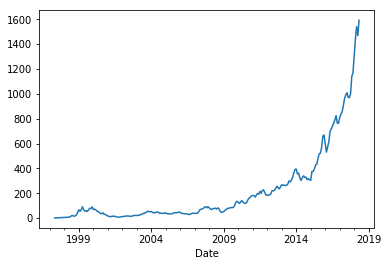

In [15]:
## Plot with resample - average monthly price 
df.Close.resample('M').mean().plot()

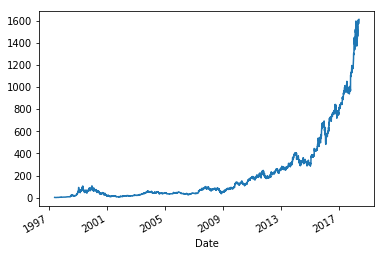

In [18]:
## Plot without Resample
df.Close.plot()

<br>
**Assigning date to a dataset with missing date**
    - The following example is the April 2018 Amazon stock prices but without any date
    - Read the stock closing price with the missing date
    - Assign the date to match the stock price

In [19]:
## Read April 2018 Amazon stock price without date column
df1 = pd.read_csv('data\Amazon_No_Date.csv')
df1.head()

,Open,High,Low,Close,Adj Close,Volume
0,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
1,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
3,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
4,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300


<br>
**Assign the date to match the data**
    - Use "rng" function to assign date to matach stock price
    - Apply "B" (Business Day) as the frequency
    - Shift+ tab twice on "B" to follow the link for more day function
    - The Business day function does not consider holidays

In [20]:
rng = pd.date_range(start="4/1/2018", end = "4/30/2018", freq='B')
rng

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

<br>
**Set the date column as the index**<br> - You must specify "True" to modify the original dataframe

In [22]:
df1.set_index(rng,inplace=True)
df1.head(5)

,Open,High,Low,Close,Adj Close,Volume
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300


In [31]:
## Average Amazon price between 4/1/18 - 4/10/18
df1["2018-04-01":"2018-04-10"].Close.mean() 

1410.555698857143

<br>
**Add weekends to the list**<br> - The price would be the same as the previous business day's closing price

In [23]:
df1.asfreq('D', method='pad').head()

,Open,High,Low,Close,Adj Close,Volume
2018-04-02,1417.619995,1421.359985,1355.000000,1371.989990,1371.989990,10463600
2018-04-03,1391.380005,1414.000000,1355.329956,1392.050049,1392.050049,10231200
2018-04-04,1358.239990,1415.390015,1352.880005,1410.569946,1410.569946,6982300
2018-04-05,1441.989990,1459.560059,1427.069946,1451.750000,1451.750000,6413500
2018-04-06,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300


<br>
**View stock data by weekly**<br> - 4/1/18 is Sunday (non-business day), the weekly date starts at 4/8/18

In [33]:
df1.asfreq('W', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2018-04-08,1429.969971,1452.500000,1400.260010,1405.229980,1405.229980,5882300
2018-04-15,1449.140015,1459.780029,1424.520020,1430.790039,1430.790039,3685300
2018-04-22,1561.199951,1561.199951,1516.089966,1527.489990,1527.489990,5541600
2018-04-29,1634.010010,1638.099976,1567.390015,1572.619995,1572.619995,13053200


<br>
** Mock Data - Generating Dates and Random Data for Testing**
    - Set the date frequency to 'B' for business days
    - Import numpy to generate random numbers
    - Set the index to match the random numbers

<br>
**Generating business days**<br> - Generate 30 business days starting from 8/15/2018

In [25]:
rng = pd.date_range(start='8/15/2018', periods=30, freq='B')
rng

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30',
               '2018-08-31', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-10', '2018-09-11',
               '2018-09-12', '2018-09-13', '2018-09-14', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-24', '2018-09-25'],
              dtype='datetime64[ns]', freq='B')

<br>
**Import numpy to generate random numbers**<br> - Generate random numbers between 1 to 20 for the length of 30 days

In [26]:
import numpy as np
np.random.randint(1,20,len(rng))

array([ 7, 14,  7,  2, 16,  9, 12,  5, 15,  8,  3, 18,  5,  5,  9,  8, 10,
        8, 13, 15, 12, 12, 19,  4, 18, 12, 15,  8, 16, 13])

<br>
**Set index to match the random numbers**

In [39]:
ts = pd.Series(np.random.randint(1,20,len(rng)), index=rng)
ts.head()

2018-07-02    10
2018-07-03     3
2018-07-04    16
2018-07-05     2
2018-07-06    12
Freq: B, dtype: int32